<a href="https://colab.research.google.com/github/yjb-git/colab/blob/main/Harris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
dog_path = "/content/Dog_Breeds.jpg"

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [18]:
img = cv2.imread(dog_path)

In [27]:
def show_img(img) :
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.title("Image showed")
  plt.show()

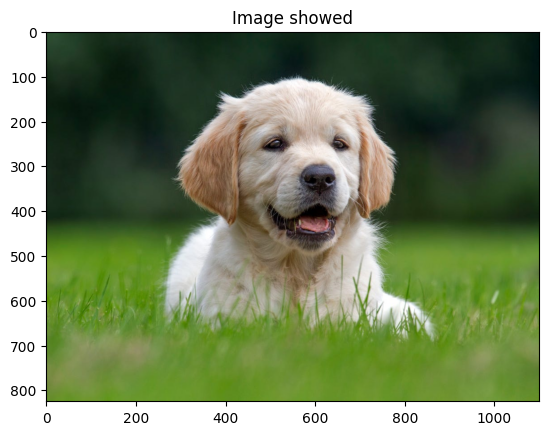

In [28]:
show_img(img)

In [46]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

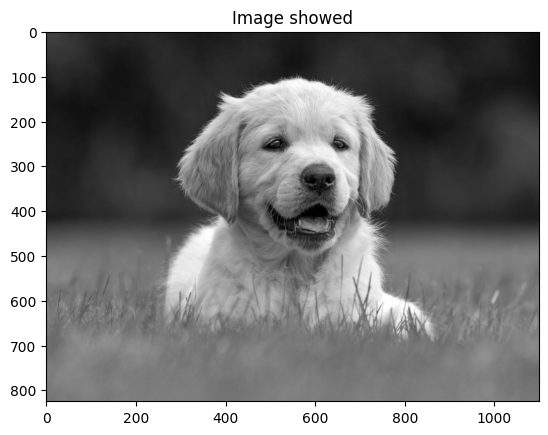

In [48]:
show_img(gray)

In [53]:
gray_f = gray.astype(np.float32)
gray_f.shape

(825, 1100)

In [54]:
Ix = cv2.Sobel(gray_f, cv2.CV_32F, 1, 0, ksize=3)
Iy = cv2.Sobel(gray_f, cv2.CV_32F, 0, 1, ksize=3)

In [65]:
# we get Ix, Iy.
# now define kerner w  : 3x3
w = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]], dtype = np.float32)

In [70]:
Ix2 = Ix*Ix
Iy2 = Iy*Iy
Ixy = Ix*Iy

In [75]:
A11 = cv2.GaussianBlur(Ix2, (3,3), 1.0)
A22 = cv2.GaussianBlur(Iy2, (3,3), 1.0)
A12 = cv2.GaussianBlur(Ixy, (3,3), 1.0)

In [76]:
alpha = 0.06
harris = A11*A22 - A12*A12 - alpha*(A11+A22)**2

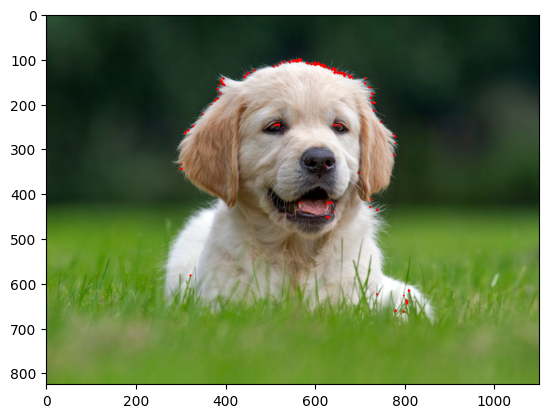

In [83]:
vis = img.copy()
H = harris.copy()
Rnorm = cv2.normalize(H, None, 0, 1, cv2.NORM_MINMAX)
th = 0.5
ys, xs = np.where(Rnorm > th)
for (x, y) in zip(xs, ys):
    cv2.circle(vis, (x, y), 2, (0, 0, 255), -1)  # red dot

# plt img show
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))